In [28]:
import numpy as np 
import matplotlib.pyplot as plt 
class AdalineSGD:
    def __init__(self, edu = 0.01, n_iter = 10,shuffle = True, random_state = None):
       
        self.edu = edu
        self.n_iter =  n_iter
        
        self.shuffle = shuffle
        self.w_initialized = False
        
        
    def _shuffle(self,x,y):
        r = np.random.permutation(len(y))
        return x[r], y[r]
    
    def _init_weights(self,m):
        self.w_ = np.zeros(1 + m)
        self.w_initialized = True
    
    def _update_weights(self, xi, target):
        output = self.net_input(xi)
        error = target - output
        self.w_[1:] += self.edu * xi.dot(error)
        self.w_[0] += self.edu * error
        cost = 0.5 * error**2
        return cost 
    
    def net_input(self, x):
        return np.dot(x, self.w_[1:]) + self.w_[0]
    
    def activation(self, x):
        return self.net_input(x)
    
    def predict(self,x):
        return np.where(self.activation(x) >= 0.0, 1, -1)
    
    def partial_fit(self, x , y ):
        if not self.w_initialized:
            self._init_weights(x.shape[1])
        if y.ravel().shape[0] > 1:
            for xi, target in zip(x,y):
                self._update_weights(xi, target)
        else:
            self._update_weights(x,y)
        return self
                
    def fit(self, x, y):
        self._init_weights( x.shape[1] )
        self.cost_ = []
        
        for i in range(self.n_iter):
            if self.shuffle:
                x, y = self._shuffle(x, y)
            cost = []
            for xi, target in zip(x, y):
                cost.append(self._update_weights(xi,target))
            avg_cost = sum(cost)/len(y)
            self.cost_.append(avg_cost)
        return self
            
        
        

In [11]:
import pandas as pd 
url = 'https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv'
df = pd.read_csv(url, header = None)

y = df.iloc[1:101,4].values
y = np.where(y == 'setosa', -1, 1)
x = df.iloc[1:101,[0,2]].values
x = x.astype(float)


x_std = np.copy(x)
x_std[:,0] = (x[:,0] - x[:,0].mean()  ) /x[:,0].std()
x_std[:,1] = (x[:,1] - x[:,1].mean()  ) /x[:,1].std()

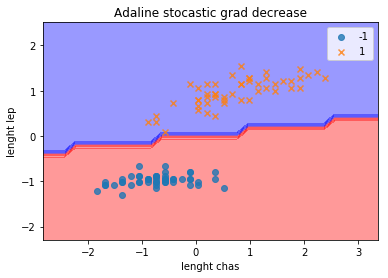

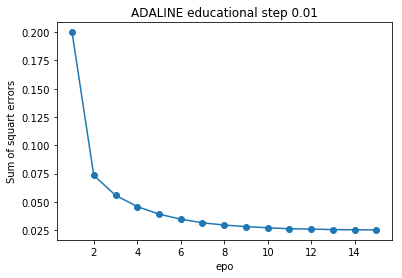

In [29]:
import func as f

ada = AdalineSGD(0.01,15,random_state=1)
ada.fit(x_std, y)

f.plot_desicion_regions(x_std,y,ada)
plt.title("Adaline stocastic grad decrease")
plt.xlabel("lenght chas")
plt.ylabel("lenght lep")
plt.legend(loc ="best")
plt.show()

plt.plot( range(1, len(ada.cost_) + 1), ada.cost_, marker = "o")
plt.xlabel("epo")
plt.ylabel("Sum of squart errors")
plt.title("ADALINE educational step {0}".format(ada.edu))
plt.show()
